### **PREDICTIVE MODELING OF DIARRHEAL DISEASE BASED ON DRINKING WATER QUALITY PARAMETERS**

In [127]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [129]:
water_data = pd.read_csv('Water_Quality_Analysis.csv')
water_data

Index        pH      Iron   Nitrate    Chloride           Lead  \
0         0  8.332988  0.000083  8.605777  122.799772   3.710000e-52   
1         1  6.917863  0.000081  3.734167  227.029851   7.850000e-94   
2         2  5.443762  0.020106  3.816994  230.995630   5.290000e-76   
3         3  7.955339  0.143988  8.224944  178.129940  4.000000e-176   
4         4  8.091909  0.002167  9.925788  186.540872  4.170000e-132   
...     ...       ...       ...       ...         ...            ...   
4497   4497  6.702334  0.000010  8.646498  228.718360   4.000000e-64   
4498   4498  6.617190  0.002800  2.589404  113.344739   2.250000e-17   
4499   4499  7.491248  0.000059  5.165625  135.400641   1.710000e-65   
4500   4500  7.209134  0.005196  2.060831  174.744707   6.350000e-40   
4501   4501  7.588409  0.003761  6.277267  181.077571  2.740000e-157   

          Zinc           Color  Turbidity  Fluoride  ...  Chlorine  \
0     3.434827       Colorless   0.022683  0.607283  ...  3.708178   
1     1.245317    Faint Yellow   0.019007  0.622874  ...  3.292038   
2     0.528280    Light Yellow   0.319956  0.423423  ...  3.560224   
3     4.027879  Near Colorless   0.166319  0.208454  ...  3.516907   
4     3.807511    Light Yellow   0.004867  0.222912  ...  3.177849   
...        ...             ...        ...       ...  ...       ...   
4497  0.053592    Faint Yellow   0.547121       NaN  ...  3.565785   
4498  0.033267    Faint Yellow   0.784954  1.828688  ...  4.048765   
4499  0.225941  Near Colorless   0.443183  1.592069  ...  2.815534   
4500  0.628918    Faint Yellow   0.404664  1.439953  ...  3.156785   
4501  2.574124  Near Colorless   0.452232  0.841708  ...  3.147968   

         Manganese  Total Dissolved Solids   Source  Water Temperature  \
0     2.270000e-15              332.118789      NaN                NaN   
1     8.020000e-07              284.641984     Lake          15.348981   
2     7.007989e-02              570.054094    River          11.643467   
3     2.468295e-02              100.043838   Ground          10.092392   
4     3.296139e-03              168.075545   Spring          15.249416   
...            ...                     ...      ...                ...   
4497  1.573763e-02              452.945562   Ground          13.002198   
4498  4.660000e-06              349.838555     Well          23.926515   
4499  2.407850e-04               48.461702     Well          10.125778   
4500  1.164155e-02              468.585948  Aquifer          13.619075   
4501  2.467165e-02                6.613680      Spr                NaN   

      Air Temperature     Month   Day  Time of Day  Target  
0           43.493324   January  29.0          4.0     0.0  
1           71.220586  November  26.0         16.0     1.0  
2           44.891330   January  31.0          8.0     1.0  
3           60.843233     April   1.0         21.0     0.0  
4           69.336671      June  29.0          7.0     0.0  
...               ...       ...   ...          ...     ...  
4497        59.076133      July  25.0         12.0     1.0  
4498        55.755351      June  25.0          5.0     0.0  
4499        51.280864  February  12.0          NaN     1.0  
4500        59.268351   January   5.0          7.0     1.0  
4501              NaN       NaN   NaN          NaN     NaN  

[4502 rows x 24 columns]

In [130]:
water_data.head() #displays the first 5 data's

Index        pH      Iron   Nitrate    Chloride           Lead      Zinc  \
0      0  8.332988  0.000083  8.605777  122.799772   3.710000e-52  3.434827   
1      1  6.917863  0.000081  3.734167  227.029851   7.850000e-94  1.245317   
2      2  5.443762  0.020106  3.816994  230.995630   5.290000e-76  0.528280   
3      3  7.955339  0.143988  8.224944  178.129940  4.000000e-176  4.027879   
4      4  8.091909  0.002167  9.925788  186.540872  4.170000e-132  3.807511   

            Color  Turbidity  Fluoride  ...  Chlorine     Manganese  \
0       Colorless   0.022683  0.607283  ...  3.708178  2.270000e-15   
1    Faint Yellow   0.019007  0.622874  ...  3.292038  8.020000e-07   
2    Light Yellow   0.319956  0.423423  ...  3.560224  7.007989e-02   
3  Near Colorless   0.166319  0.208454  ...  3.516907  2.468295e-02   
4    Light Yellow   0.004867  0.222912  ...  3.177849  3.296139e-03   

   Total Dissolved Solids  Source  Water Temperature  Air Temperature  \
0              332.118789     NaN                NaN        43.493324   
1              284.641984    Lake          15.348981        71.220586   
2              570.054094   River          11.643467        44.891330   
3              100.043838  Ground          10.092392        60.843233   
4              168.075545  Spring          15.249416        69.336671   

      Month   Day  Time of Day  Target  
0   January  29.0          4.0     0.0  
1  November  26.0         16.0     1.0  
2   January  31.0          8.0     1.0  
3     April   1.0         21.0     0.0  
4      June  29.0          7.0     0.0  

[5 rows x 24 columns]

In [131]:
water_data.tail() #displays the last 5 data's

Index        pH      Iron   Nitrate    Chloride           Lead  \
4497   4497  6.702334  0.000010  8.646498  228.718360   4.000000e-64   
4498   4498  6.617190  0.002800  2.589404  113.344739   2.250000e-17   
4499   4499  7.491248  0.000059  5.165625  135.400641   1.710000e-65   
4500   4500  7.209134  0.005196  2.060831  174.744707   6.350000e-40   
4501   4501  7.588409  0.003761  6.277267  181.077571  2.740000e-157   

          Zinc           Color  Turbidity  Fluoride  ...  Chlorine  Manganese  \
4497  0.053592    Faint Yellow   0.547121       NaN  ...  3.565785   0.015738   
4498  0.033267    Faint Yellow   0.784954  1.828688  ...  4.048765   0.000005   
4499  0.225941  Near Colorless   0.443183  1.592069  ...  2.815534   0.000241   
4500  0.628918    Faint Yellow   0.404664  1.439953  ...  3.156785   0.011642   
4501  2.574124  Near Colorless   0.452232  0.841708  ...  3.147968   0.024672   

      Total Dissolved Solids   Source  Water Temperature  Air Temperature  \
4497              452.945562   Ground          13.002198        59.076133   
4498              349.838555     Well          23.926515        55.755351   
4499               48.461702     Well          10.125778        51.280864   
4500              468.585948  Aquifer          13.619075        59.268351   
4501                6.613680      Spr                NaN              NaN   

         Month   Day  Time of Day  Target  
4497      July  25.0         12.0     1.0  
4498      June  25.0          5.0     0.0  
4499  February  12.0          NaN     1.0  
4500   January   5.0          7.0     1.0  
4501       NaN   NaN          NaN     NaN  

[5 rows x 24 columns]

In [132]:
water_data.shape #the rows and columns

(4502, 24)

In [133]:
water_data.info() #features in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4502 entries, 0 to 4501
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   4502 non-null   int64  
 1   pH                      4415 non-null   float64
 2   Iron                    4468 non-null   float64
 3   Nitrate                 4430 non-null   float64
 4   Chloride                4382 non-null   float64
 5   Lead                    4480 non-null   float64
 6   Zinc                    4394 non-null   float64
 7   Color                   4497 non-null   object 
 8   Turbidity               4467 non-null   float64
 9   Fluoride                4335 non-null   float64
 10  Copper                  4362 non-null   float64
 11  Odor                    4372 non-null   float64
 12  Sulfate                 4357 non-null   float64
 13  Conductivity            4368 non-null   float64
 14  Chlorine                4454 non-null   

In [134]:
water_data.describe() #mean, standard deviation, min

Index           pH          Iron      Nitrate     Chloride  \
count  4502.000000  4415.000000  4.468000e+03  4430.000000  4382.000000   
mean   2250.500000     7.472793  6.957213e-02     5.748753   173.176667   
std    1299.759785     0.695684  3.047468e-01     2.685253    53.293953   
min       0.000000     3.665884  2.050000e-31     0.827426    38.977696   
25%    1125.250000     6.981916  8.092500e-06     3.854819   135.966273   
50%    2250.500000     7.475027  1.751326e-03     5.353576   170.411443   
75%    3375.750000     7.968110  3.869073e-02     7.275878   207.686125   
max    4501.000000    10.877519  6.486109e+00    36.857856   542.575488   

                Lead         Zinc     Turbidity     Fluoride       Copper  \
count   4.480000e+03  4394.000000  4.467000e+03  4335.000000  4362.000000   
mean    4.346820e-04     1.439869  3.682893e-01     0.867363     0.421298   
std     9.252222e-03     1.312036  5.842326e-01     0.664200     0.442701   
min     0.000000e+00     0.000028  2.310000e-11     0.000532     0.000008   
25%    1.026500e-122     0.408876  3.359683e-02     0.361273     0.122029   
50%     1.840000e-65     1.061733  1.748158e-01     0.739247     0.316113   
75%     1.020250e-27     2.146509  5.265544e-01     1.234906     0.603327   
max     3.131172e-01    17.468694  9.909325e+00     5.978266     5.857411   

       ...      Sulfate  Conductivity     Chlorine     Manganese  \
count  ...  4357.000000   4368.000000  4454.000000  4.427000e+03   
mean   ...   138.008873    423.292548     3.172731  3.770806e-02   
std    ...    57.684843    188.307584     0.646743  2.676246e-01   
min    ...    16.164578     31.431001     1.485050  2.260000e-31   
25%    ...    94.966140    286.653678     2.711159  1.225000e-06   
50%    ...   131.140225    395.768696     3.162803  2.649090e-04   
75%    ...   174.485563    528.236724     3.611697  7.426942e-03   
max    ...   784.553134   1369.936394     9.491165  6.645917e+00   

       Total Dissolved Solids  Water Temperature  Air Temperature  \
count             4499.000000        4373.000000      4478.000000   
mean               257.988297          18.918867        60.095321   
std                149.656291          10.788326        17.871425   
min                  0.112958           2.629261        -1.819144   
25%                129.266584          11.351402        48.173980   
50%                258.015123          16.483723        60.580671   
75%                386.239734          23.625155        72.414365   
max                579.579250          92.376833       126.757062   

               Day  Time of Day       Target  
count  4431.000000  4430.000000  4501.000000  
mean     15.744302    11.530700     0.506998  
std       8.743282     6.960186     0.500007  
min       1.000000     0.000000     0.000000  
25%       8.000000     6.000000     0.000000  
50%      16.000000    12.000000     1.000000  
75%      23.000000    18.000000     1.000000  
max      31.000000    23.000000     1.000000  

[8 rows x 21 columns]

In [135]:
water_data.isnull().sum() # missing values

Index                       0
pH                         87
Iron                       34
Nitrate                    72
Chloride                  120
Lead                       22
Zinc                      108
Color                       5
Turbidity                  35
Fluoride                  167
Copper                    140
Odor                      130
Sulfate                   145
Conductivity              134
Chlorine                   48
Manganese                  75
Total Dissolved Solids      3
Source                     64
Water Temperature         129
Air Temperature            24
Month                      55
Day                        71
Time of Day                72
Target                      1
dtype: int64

In [136]:
water_data = water_data.dropna() #removing the null values

In [137]:
water_data.isnull().sum() # after removal of null values

Index                     0
pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Color                     0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Source                    0
Water Temperature         0
Air Temperature           0
Month                     0
Day                       0
Time of Day               0
Target                    0
dtype: int64

## **DATA VISUALIZATION**

<Axes: xlabel='Index', ylabel='Fluoride'>

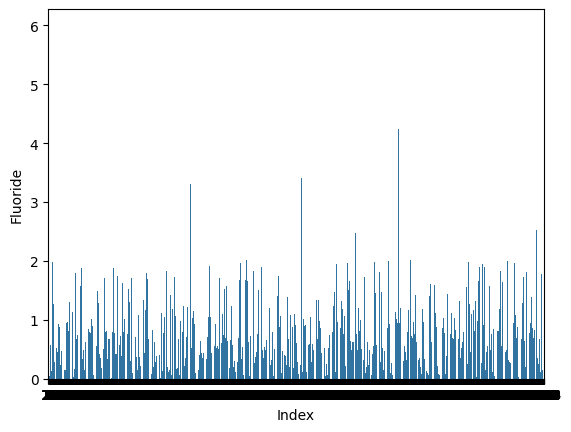

In [138]:
sns.barplot(x='Index', y='Fluoride', data=water_data)

<Axes: xlabel='Total Dissolved Solids', ylabel='Turbidity'>

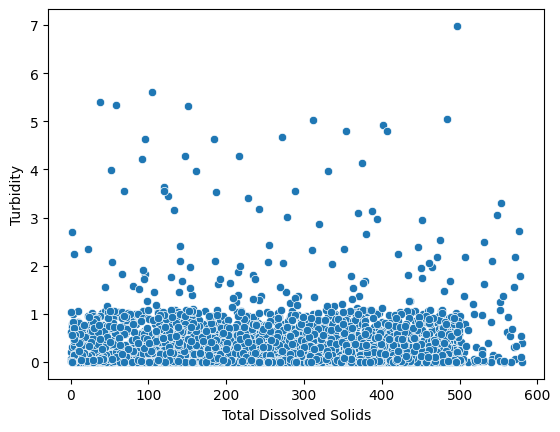

In [139]:
sns.scatterplot(x='Total Dissolved Solids', y='Turbidity', data=water_data)

Text(0.5, 1.0, 'Fluoride Concentration Distribution')

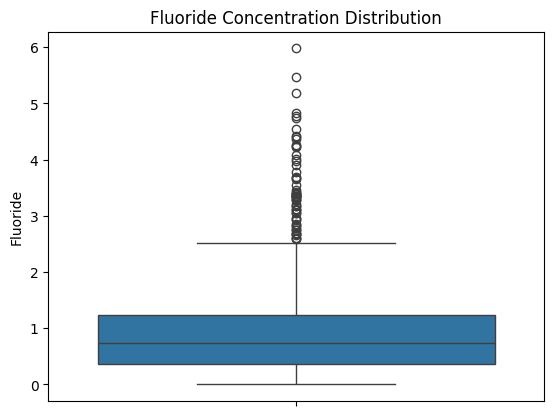

In [140]:
sns.boxplot(y='Fluoride', data=water_data)
plt.title("Fluoride Concentration Distribution")

Text(0.5, 1.0, 'pH vs Turbidity')

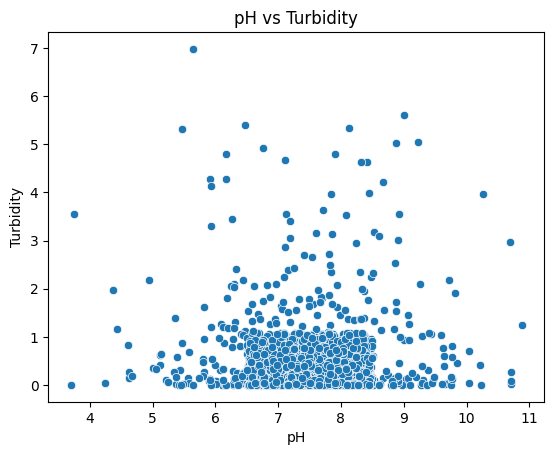

In [141]:
sns.scatterplot(x='pH', y='Turbidity', data=water_data)
plt.title("pH vs Turbidity")

Text(0.5, 1.0, 'TDS Levels per Sample')

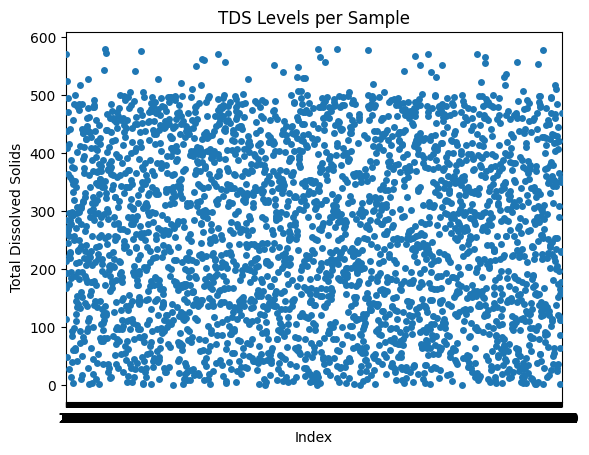

In [142]:
sns.swarmplot(x='Index', y='Total Dissolved Solids', data=water_data)
plt.title("TDS Levels per Sample")

Text(0.5, 1.02, 'Pairwise Plot with Target Coloring')

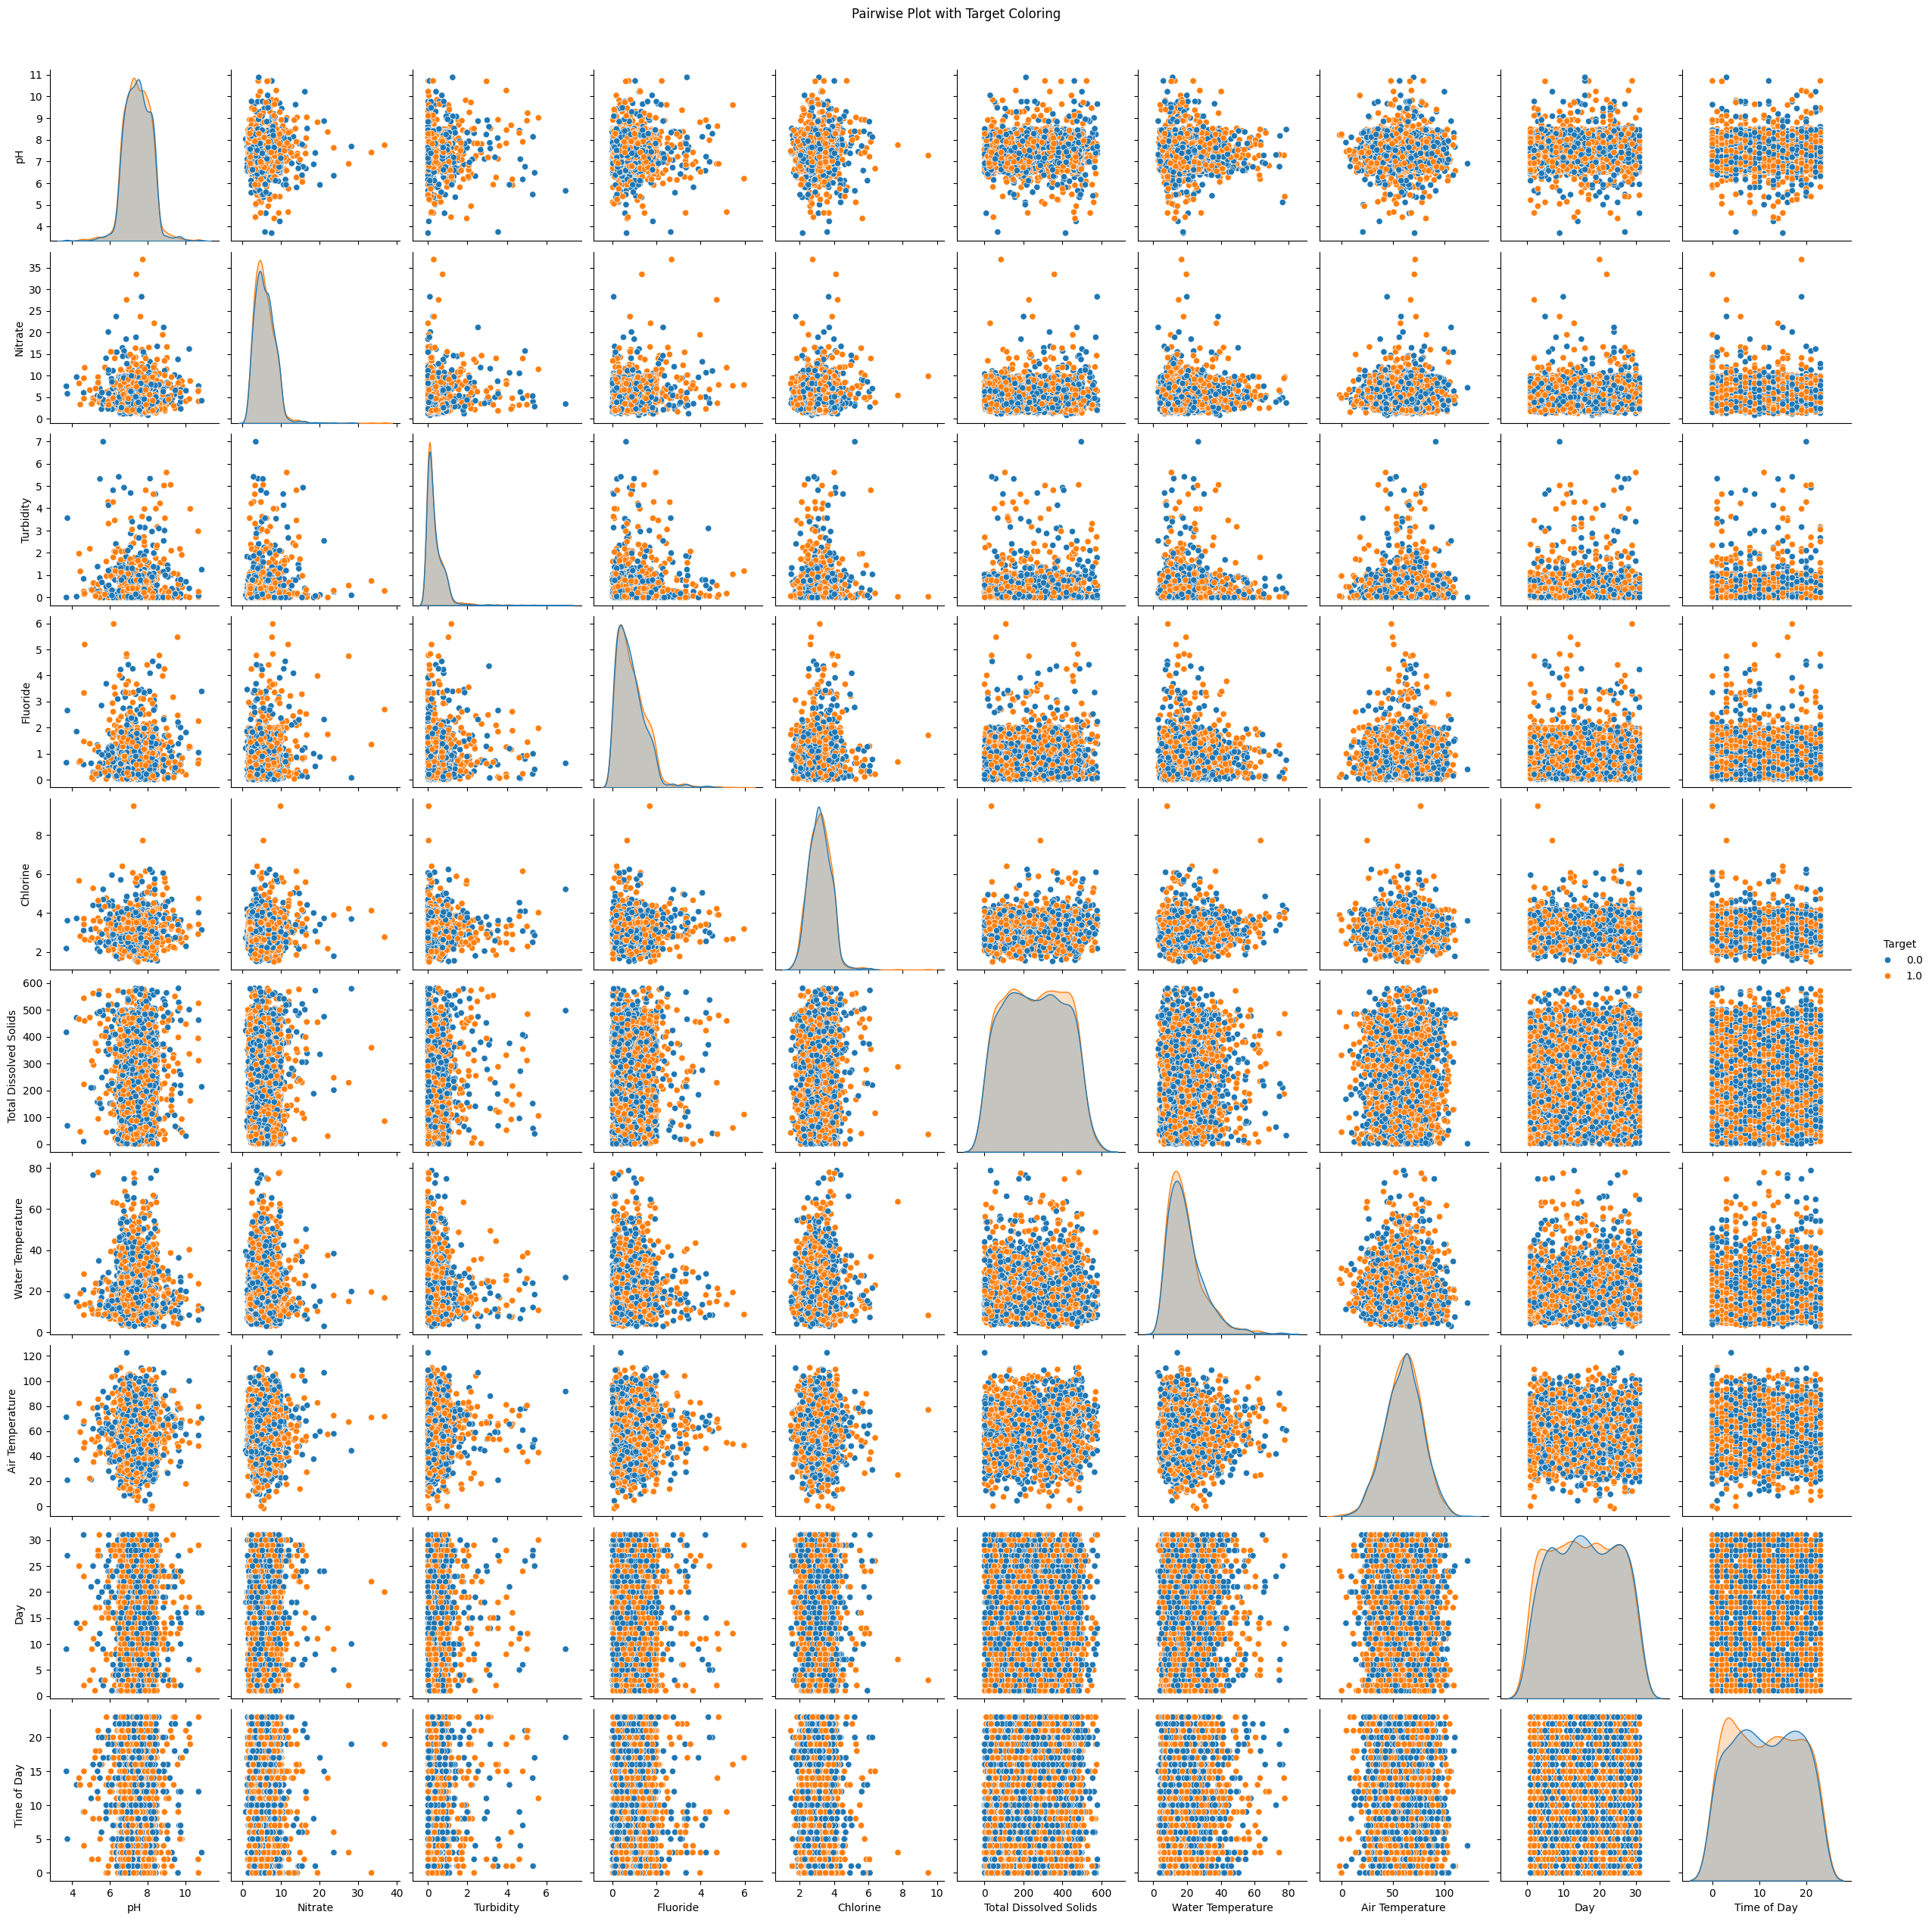

In [232]:
sns.pairplot(water_data.drop(columns='Index'), hue='Target')
plt.suptitle("Pairwise Plot with Target Coloring", y=1.02)

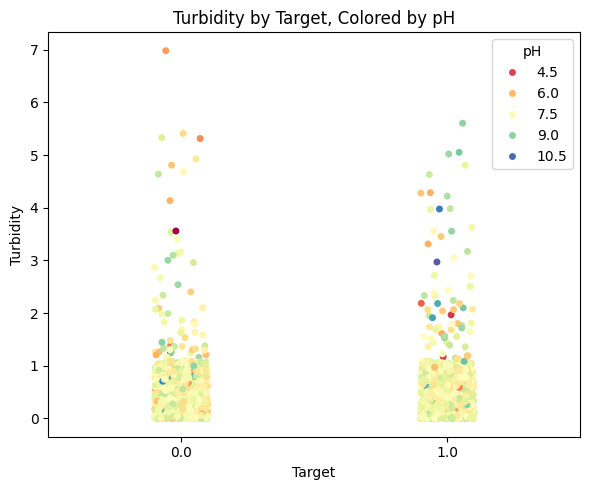

In [233]:
plt.figure(figsize=(6, 5))
sns.stripplot(data=water_data, x='Target', y='Turbidity', hue='pH', jitter=True, palette='Spectral')
plt.title("Turbidity by Target, Colored by pH")
plt.tight_layout()
plt.show()


## **Analyzing the Water Quality Parameters**

# **Chemical Parameters - Nitrate (NO₃⁻), Chlorine residual, Fluoride,  Turbidity, Total Dissolved Solids (TDS)**

<Axes: xlabel='Nitrate', ylabel='Density'>

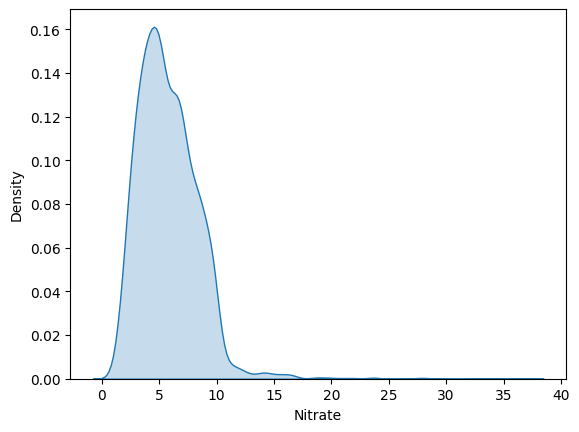

In [143]:
sns.kdeplot(water_data["Nitrate"], shade = True)

In [144]:
# Function to classify nitrate safety
def nitrate_status(value):
    if value <= 50:
        return 'Safe'
    else:
        return 'Unsafe'

In [145]:
# Add status column
water_data['Nitrate Status'] = water_data['Nitrate'].apply(nitrate_status)

In [146]:
water_data[['Index', 'Nitrate', 'Nitrate Status']].head()

Index   Nitrate Nitrate Status
1      1  3.734167           Safe
2      2  3.816994           Safe
4      4  9.925788           Safe
7      7  9.261676           Safe
9      9  3.620641           Safe

In [147]:
# Count of status types
print("\n📊 Nitrate Status Counts:")
print(water_data['Nitrate Status'].value_counts())


📊 Nitrate Status Counts:
Nitrate Status
Safe    3039
Name: count, dtype: int64


<Axes: xlabel='Nitrate Status', ylabel='count'>

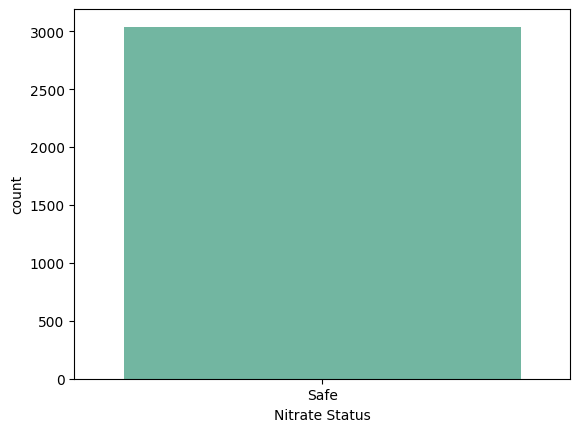

In [148]:
sns.countplot(x = 'Nitrate Status', data = water_data, palette = 'Set2')

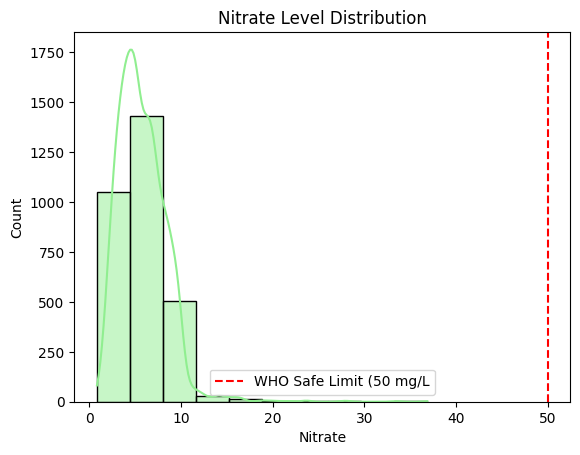

In [149]:
sns.histplot(water_data['Nitrate'], bins=10, kde=True, color='lightgreen')
plt.axvline(50, color='red', linestyle='--', label='WHO Safe Limit (50 mg/L')
plt.title("Nitrate Level Distribution")
plt.legend()
plt.show()

**Chlorine**

<Axes: xlabel='Chlorine', ylabel='Density'>

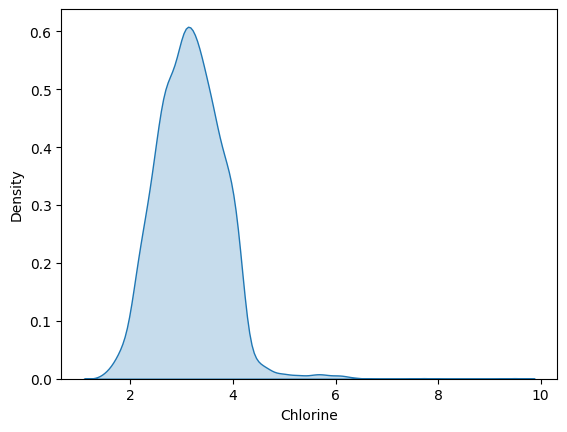

In [150]:
sns.kdeplot(water_data["Chlorine"], shade = True)

In [151]:
# Function to classify chlorine status
def chlorine_status(value):
    if value < 0.2:
        return 'Low'
    elif 0.2 <= value <= 1.0:
        return 'Safe'
    elif 1.0 < value <= 5.0:
        return 'High'
    else:
        return 'Unsafe'

<Axes: xlabel='Color', ylabel='count'>

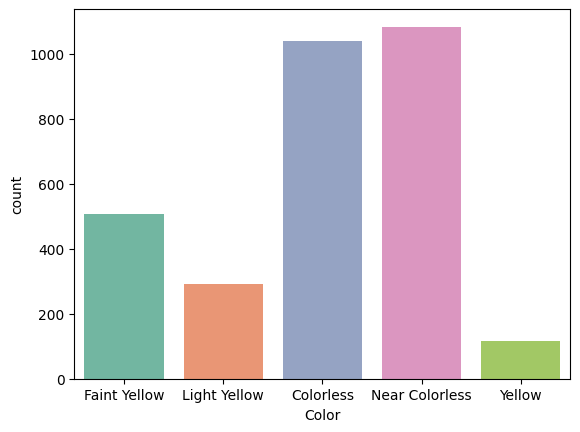

In [152]:
sns.countplot(x = 'Color', data = water_data, palette = 'Set2')

In [158]:
# Add status column
water_data['Chlorine Status'] = water_data['Chlorine'].apply(chlorine_status)

In [159]:
# Count and display chlorine status
print("Chlorine Status Counts:")
print(water_data['Chlorine Status'].value_counts())

Chlorine Status Counts:
Chlorine Status
High      3011
Unsafe      28
Name: count, dtype: int64


<Axes: xlabel='Chlorine Status', ylabel='count'>

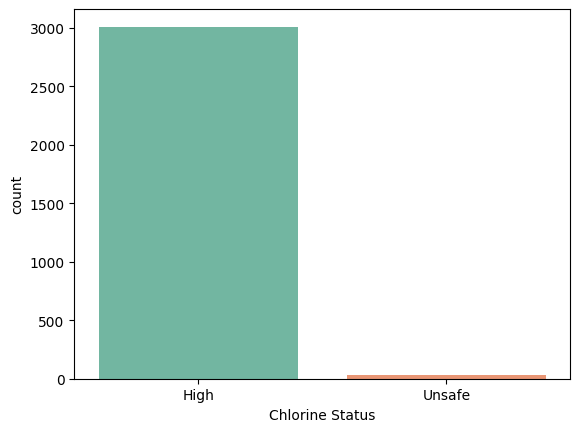

In [162]:
sns.countplot(x = 'Chlorine Status', data = water_data, palette = 'Set2')

In [160]:
print("Number of unsafe chlorine samples:", (water_data['Chlorine'] >= 5).sum())

Number of unsafe chlorine samples: 28


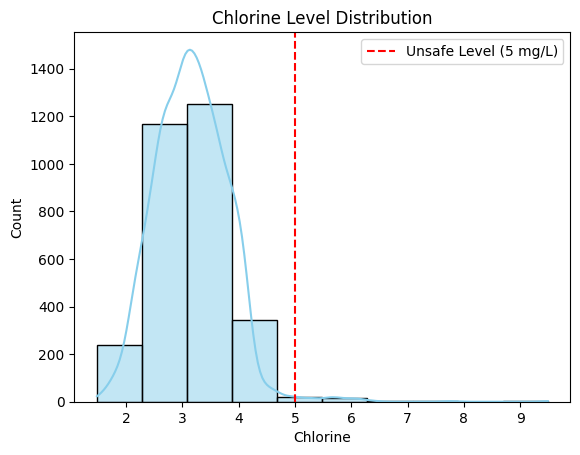

In [161]:
sns.histplot(water_data['Chlorine'], bins=10, kde=True, color='skyblue')
plt.axvline(5, color='red', linestyle='--', label='Unsafe Level (5 mg/L)')
plt.title("Chlorine Level Distribution")
plt.legend()
plt.show()

**Fluoride**

<Axes: xlabel='Fluoride', ylabel='Density'>

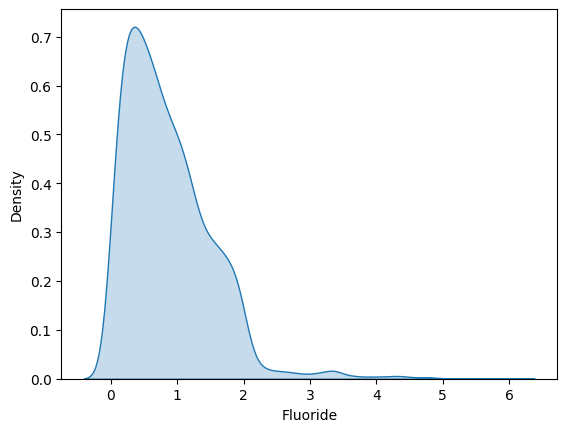

In [156]:
sns.kdeplot(water_data["Fluoride"], shade = True)

In [163]:
# Classify fluoride safety levels
water_data['Fluoride Status'] = water_data['Fluoride'].apply(
    lambda x: 'Safe' if x <= 1.0 else
              'Caution' if x <= 1.5 else
              'Unsafe'
)

In [164]:
water_data[['Index', 'Fluoride', 'Fluoride Status']].head()

Index  Fluoride Fluoride Status
1      1  0.622874            Safe
2      2  0.423423            Safe
4      4  0.222912            Safe
7      7  1.016196         Caution
9      9  0.842107            Safe

In [165]:
# Count of status types
print("\n📊 Fluoride Status Counts:")
print(water_data['Fluoride Status'].value_counts())


📊 Fluoride Status Counts:
Fluoride Status
Safe       1971
Caution     570
Unsafe      498
Name: count, dtype: int64


<Axes: xlabel='Fluoride Status', ylabel='count'>

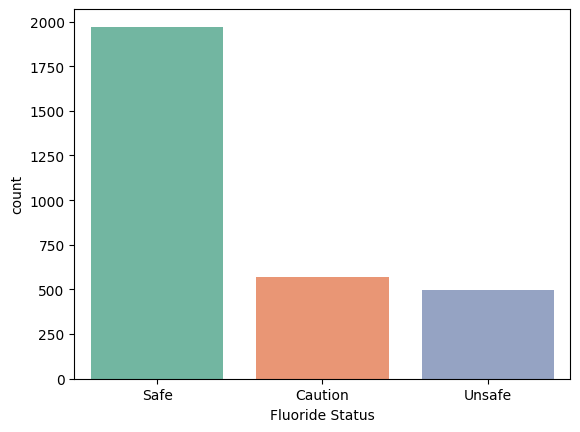

In [166]:
sns.countplot(x = 'Fluoride Status', data = water_data, palette = 'Set2')

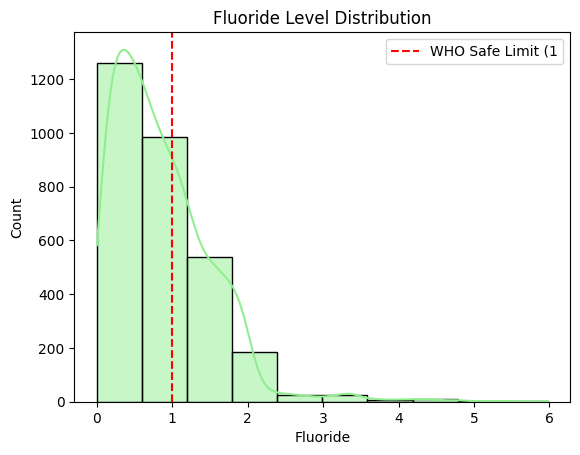

In [167]:
sns.histplot(water_data['Fluoride'], bins=10, kde=True, color='lightgreen')
plt.axvline(1, color='red', linestyle='--', label='WHO Safe Limit (1')
plt.title("Fluoride Level Distribution")
plt.legend()
plt.show()

**Turbidity**

<Axes: xlabel='Turbidity', ylabel='Density'>

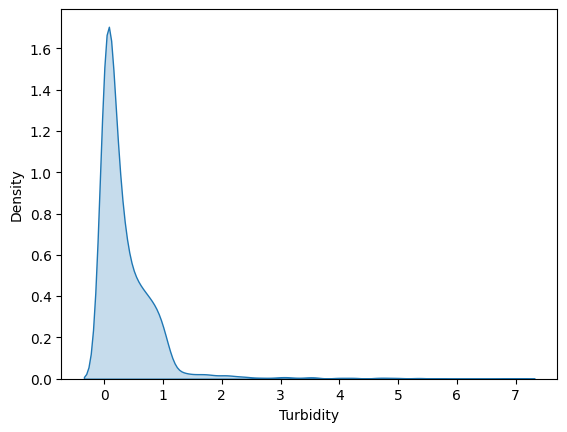

In [168]:
sns.kdeplot(water_data["Turbidity"], shade = True)

In [ ]:
# Function to classify turbidity levels
def turbidity_status(ntu):
    if ntu < 1:
        return 'Excellent', 'Recommended for effective disinfection'
    elif 1 <= ntu <= 5:
        return 'Acceptable', 'Safe appearance, but may reduce disinfection'
    else:
        return 'Unacceptable', 'Poor appearance, disinfection may be ineffective'

In [169]:
# Apply classification
water_data[['Turbidity Status', 'Remarks']] = water_data['Turbidity'].apply(lambda x: pd.Series(turbidity_status(x)))

In [170]:
# Count of status types
print("\n📊 Turbidity Status Counts:")
print(water_data['Turbidity Status'].value_counts())


📊 Turbidity Status Counts:
Turbidity Status
Excellent       2841
Acceptable       191
Unacceptable       7
Name: count, dtype: int64


<Axes: xlabel='Turbidity Status', ylabel='count'>

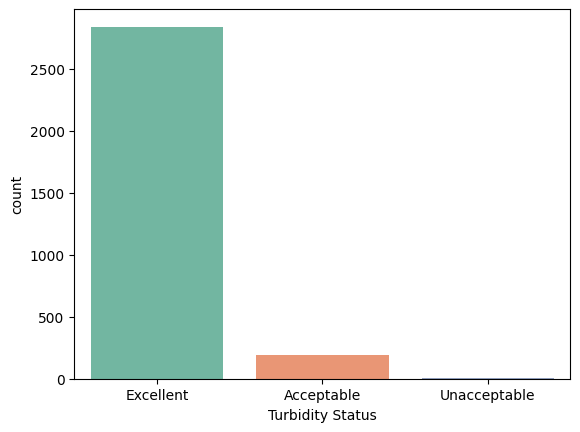

In [171]:
sns.countplot(x = 'Turbidity Status', data = water_data, palette = 'Set2')

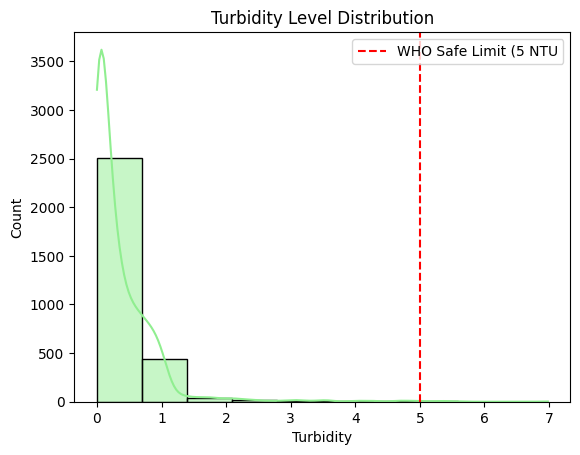

In [172]:
sns.histplot(water_data['Turbidity'], bins=10, kde=True, color='lightgreen')
plt.axvline(5, color='red', linestyle='--', label='WHO Safe Limit (5 NTU')
plt.title("Turbidity Level Distribution")
plt.legend()
plt.show()

**Total Dissolved Solids**

In [173]:
water_data[['Turbidity', 'Turbidity Status', 'Remarks']].head()

Turbidity Turbidity Status                                 Remarks
1   0.019007        Excellent  Recommended for effective disinfection
2   0.319956        Excellent  Recommended for effective disinfection
4   0.004867        Excellent  Recommended for effective disinfection
7   0.047803        Excellent  Recommended for effective disinfection
9   0.050613        Excellent  Recommended for effective disinfection

<Axes: xlabel='Total Dissolved Solids', ylabel='Density'>

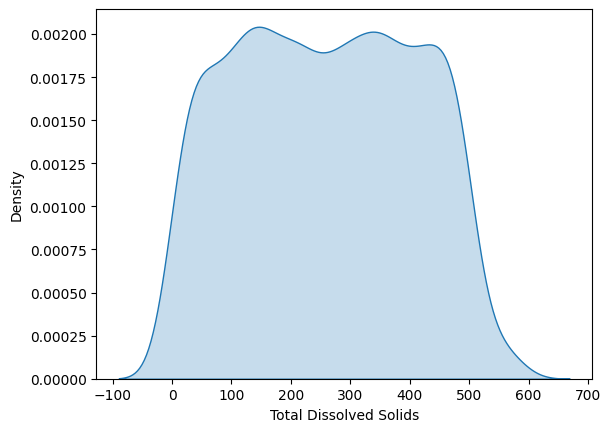

In [174]:
sns.kdeplot(water_data["Total Dissolved Solids"], shade = True)

In [175]:
# Function to classify water quality based on TDS
def tds_quality(tds):
    if tds <= 300:
        return 'Excellent', 'Ideal for drinking'
    elif 300 < tds <= 600:
        return 'Good', 'Acceptable taste'
    elif 600 < tds <= 900:
        return 'Fair', 'Slightly salty or mineral taste'
    elif 900 < tds <= 1200:
        return 'Poor', 'Unpleasant taste'
    else:
        return 'Unacceptable', 'Not recommended for drinking'


In [176]:
# Apply classification
water_data[['Water Quality', 'Remarks']] = water_data['Total Dissolved Solids'].apply(lambda x: pd.Series(tds_quality(x)))

In [177]:
# Display the classified data
water_data[['Total Dissolved Solids', 'Water Quality', 'Remarks']].head()

Total Dissolved Solids Water Quality             Remarks
1              284.641984     Excellent  Ideal for drinking
2              570.054094          Good    Acceptable taste
4              168.075545     Excellent  Ideal for drinking
7              214.553104     Excellent  Ideal for drinking
9              113.909077     Excellent  Ideal for drinking

In [178]:
# Count of status types
print("\n📊 Total Dissolved Solids Status Counts:")
print(water_data['Water Quality'].value_counts())


📊 Total Dissolved Solids Status Counts:
Water Quality
Excellent    1768
Good         1271
Name: count, dtype: int64


<Axes: xlabel='Water Quality', ylabel='count'>

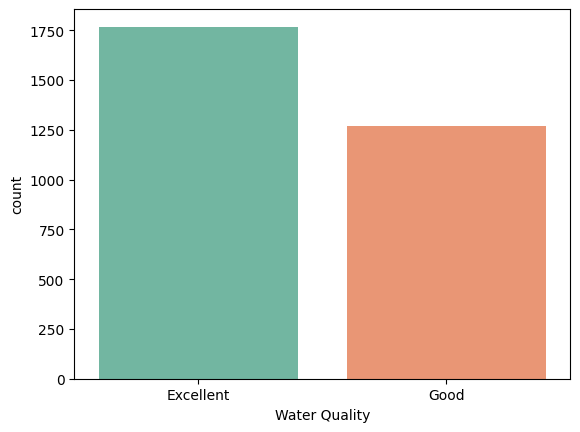

In [179]:
sns.countplot(x = 'Water Quality', data = water_data, palette = 'Set2')

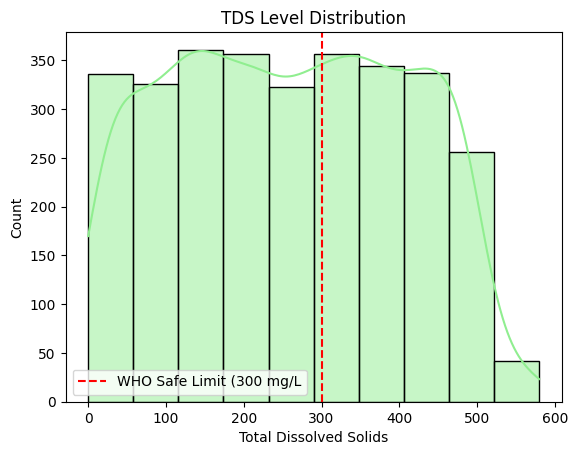

In [180]:
sns.histplot(water_data['Total Dissolved Solids'], bins=10, kde=True, color='lightgreen')
plt.axvline(300, color='red', linestyle='--', label='WHO Safe Limit (300 mg/L')
plt.title("TDS Level Distribution")
plt.legend()
plt.show()

## **Physical Parameters - pH, Temperature, Color & Odor**

**pH**

<Axes: xlabel='pH', ylabel='Density'>

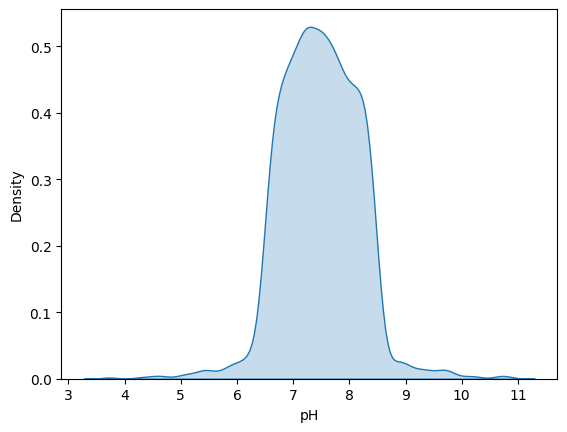

In [181]:
sns.kdeplot(water_data["pH"], shade = True)

In [185]:
# Function to classify pH status
def pH_status(value):
    if 0.0 < value < 0.69:
        return 'Acidic'
    elif 7.1 <= value <= 14.0:
        return 'Basic'
    else:
        return 'Pure Water'

In [186]:
# Add status column
water_data['pH Status'] = water_data['pH'].apply(pH_status)

In [187]:
# Count and display pH status
print("pH Counts:")
print(water_data['pH Status'].value_counts())

pH Counts:
pH Status
Basic         2110
Pure Water     929
Name: count, dtype: int64


<Axes: xlabel='pH Status', ylabel='count'>

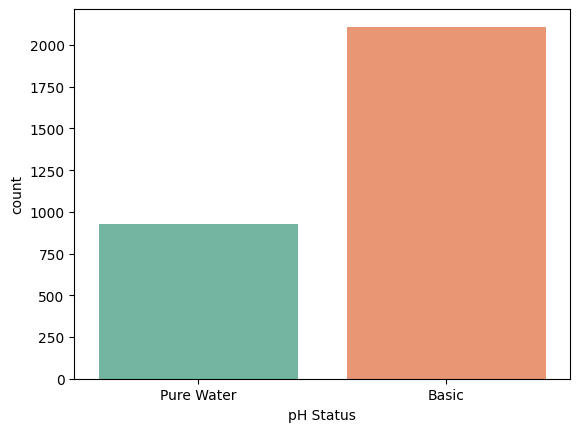

In [188]:
sns.countplot(x = 'pH Status', data = water_data, palette = 'Set2')

In [189]:
print("Number of pure water samples:", (water_data['pH'] == 7).sum())

Number of pure water samples: 0


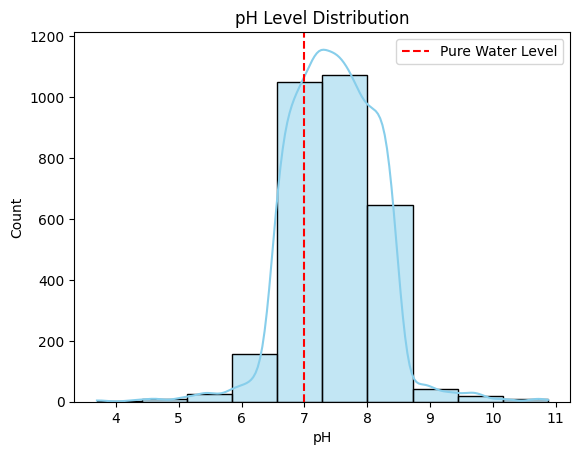

In [190]:
sns.histplot(water_data['pH'], bins=10, kde=True, color='skyblue')
plt.axvline(7, color='red', linestyle='--', label='Pure Water Level')
plt.title("pH Level Distribution")
plt.legend()
plt.show()

**Water Temperature**

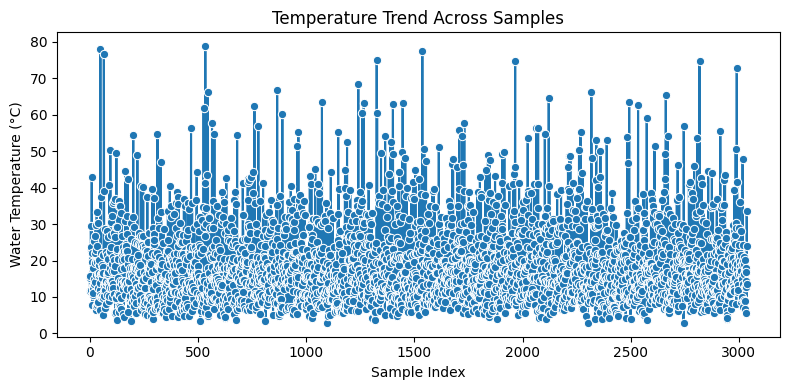

In [236]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(len(water_data)), y='Water Temperature', data=water_data, marker='o')
plt.title("Temperature Trend Across Samples")
plt.xlabel("Sample Index")
plt.ylabel("Water Temperature (°C)")
plt.tight_layout()
plt.show()

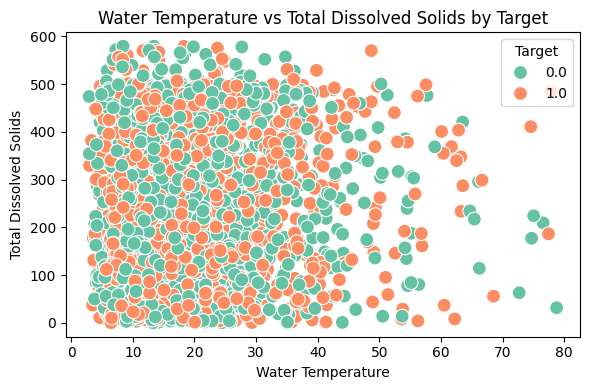

In [242]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=water_data, x='Water Temperature', y='Total Dissolved Solids', hue='Target', palette='Set2', s=100)
plt.title("Water Temperature vs Total Dissolved Solids by Target")
plt.tight_layout()
plt.show()

**Air Temperature**

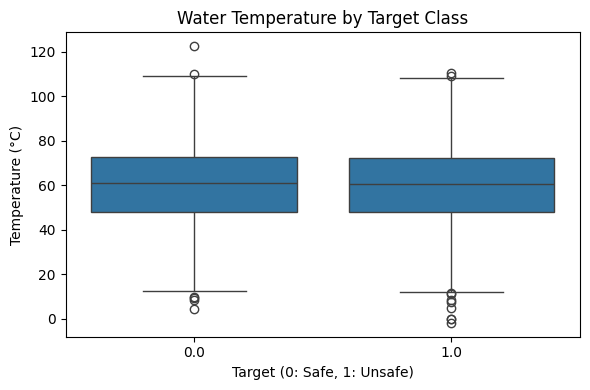

In [238]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Target', y='Air Temperature', data=water_data)
plt.title("Water Temperature by Target Class")
plt.xlabel("Target (0: Safe, 1: Unsafe)")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()

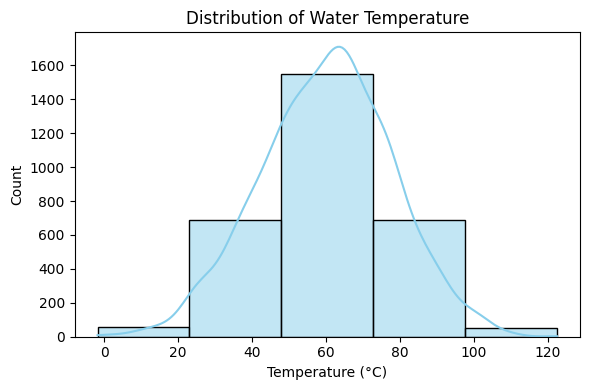

In [240]:
plt.figure(figsize=(6, 4))
sns.histplot(water_data['Air Temperature'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Water Temperature")
plt.xlabel("Temperature (°C)")
plt.tight_layout()
plt.show()

**Color**

<Axes: xlabel='Color', ylabel='count'>

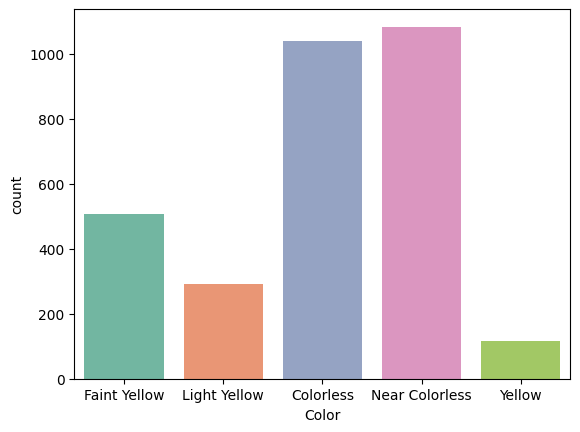

In [191]:
sns.countplot(x = 'Color', data = water_data, palette = 'Set2')

**Odor**

<Axes: xlabel='Odor', ylabel='count'>

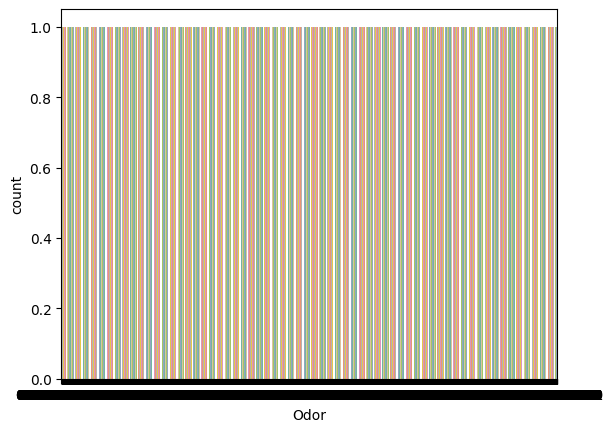

In [192]:
sns.countplot(x = 'Odor', data = water_data, palette = 'Set2')

# **Environmental / Supporting Parameters**

**Source**

<Axes: xlabel='Source', ylabel='count'>

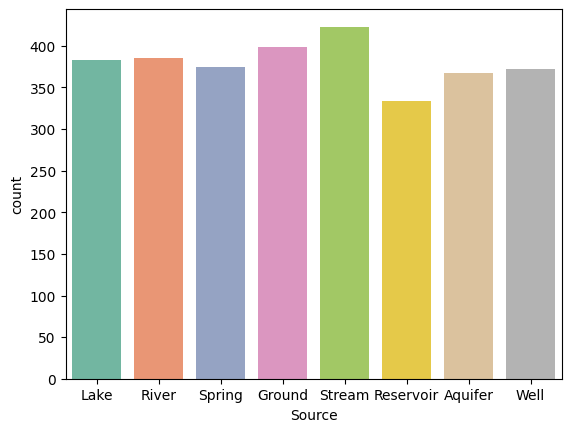

In [193]:
sns.countplot(x = 'Source', data = water_data, palette = 'Set2')

**Dropping the Columns**

In [194]:
water_data.drop(columns=['Iron', 'Chloride', 'Lead', 'Zinc', 'Color', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Manganese', 'Source'], inplace=True)

In [195]:
cols_to_drop = ['Month', 'Severity', 'Remarks', 'Formatted Time']
water_data = water_data.drop(columns=[col for col in cols_to_drop if col in water_data.columns])

In [196]:
cols_to_drop = ['Month', 'Chlorine Status', 'pH Status', 'Nitrate Status', 'Water Quality', 'Fluoride Status', 'Remarks', 'Turbidity Status', 'Severity']
water_data = water_data.drop(columns=[col for col in cols_to_drop if col in water_data.columns])

**Correlation**

In [197]:
correlation = water_data.corr()

<Axes: >

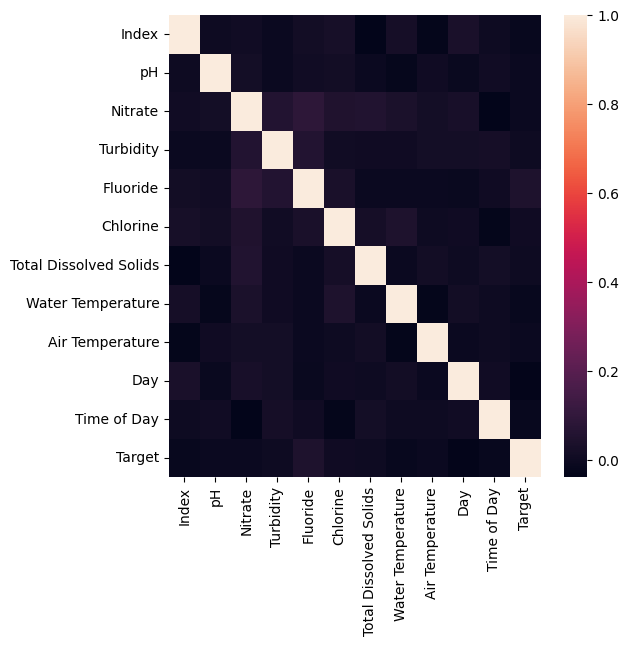

In [198]:
plot = plt.figure(figsize = (6,6))
sns.heatmap(water_data.corr())

### **MODEL BUILDING AND EVALUATION**

In [207]:
X = water_data.drop(columns = 'Target', axis = 1)
Y = water_data['Target']

In [208]:
print(X)
print()

      Index        pH   Nitrate  Turbidity  Fluoride  Chlorine  \
1         1  6.917863  3.734167   0.019007  0.622874  3.292038   
2         2  5.443762  3.816994   0.319956  0.423423  3.560224   
4         4  8.091909  9.925788   0.004867  0.222912  3.177849   
7         7  7.258203  9.261676   0.047803  1.016196  2.325094   
9         9  7.100650  3.620641   0.050613  0.842107  2.284971   
...     ...       ...       ...        ...       ...       ...   
4493   4493  7.376222  5.115937   0.146390  0.897301  4.030889   
4494   4494  7.907437  6.718604   0.047503  0.550108  3.392859   
4495   4495  7.819152  9.592924   0.219310  1.166677  3.511091   
4498   4498  6.617190  2.589404   0.784954  1.828688  4.048765   
4500   4500  7.209134  2.060831   0.404664  1.439953  3.156785   

      Total Dissolved Solids  Water Temperature  Air Temperature   Day  \
1                 284.641984          15.348981        71.220586  26.0   
2                 570.054094          11.643467        44.8

In [209]:
print(Y)

1       1.0
2       1.0
4       0.0
7       0.0
9       0.0
       ... 
4493    0.0
4494    1.0
4495    1.0
4498    0.0
4500    1.0
Name: Target, Length: 3039, dtype: float64


**Training and Testing Data**

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 1)

In [212]:
print(X.shape, X_train.shape, X_test.shape)

(3039, 11) (2735, 11) (304, 11)


In [213]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [215]:
from sklearn.model_selection import train_test_split

**Logistic Regression**

In [216]:
model = LogisticRegression()

In [217]:
# training the logistic regression model by using training data
model.fit(X_train, Y_train)
LogisticRegression()

LogisticRegression()

In [218]:
print(water_data['Target'].value_counts())

Target
1.0    1540
0.0    1499
Name: count, dtype: int64


In [219]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [220]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print('Accuracy of logistic regression classifier on training set: {:2f}'
            .format(logreg.score(X_train, Y_train)))

Accuracy of logistic regression classifier on training set: 0.522159


In [221]:
print('Accuracy of logistic regression classifier on testing set: {:2f}'
            .format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on testing set: 0.515789


**Decision Tree**

In [222]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, Y_train)
print('Accuracy of Decision Tree Classifier on training set: {:2f}'
            .format(clf.score(X_train, Y_train)))
print('Accuracy of Decision Tree Classifier on testing set: {:2f}'
            .format(clf.score(X_test, Y_test)))

Accuracy of Decision Tree Classifier on training set: 1.000000
Accuracy of Decision Tree Classifier on testing set: 0.469737


**Naive Bayes**

In [223]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
print('Accuracy of GNB Classifier on training set: {:2f}'
            .format(gnb.score(X_train, Y_train)))
print('Accuracy of GNB Classifier on testing set: {:2f}'
            .format(gnb.score(X_test, Y_test)))

Accuracy of GNB Classifier on training set: 0.519965
Accuracy of GNB Classifier on testing set: 0.497368


**Random Forest**

In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [226]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [227]:
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [228]:
# accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction, Y_train)
print('accuracy on training data:', training_data_accuracy)

accuracy on training data: 1.0


In [229]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('accuracy on testing data:', testing_data_accuracy)

accuracy on testing data: 0.5144736842105263


**SVM**

In [230]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, Y_train)
print('Accuracy of SVM Classifier on training set: {:2f}'
            .format(svm.score(X_train, Y_train)))
print('Accuracy of SVM Classifier on testing set: {:2f}'
            .format(svm.score(X_test, Y_test)))

Accuracy of SVM Classifier on training set: 0.587977
Accuracy of SVM Classifier on testing set: 0.527632
